In [1]:
from pathlib import Path
from omnibelt import toposort, load_json, save_json
from itertools import product, combinations
# import pyperclip
import random
import json
from PIL import Image
from graphviz import Digraph
import matplotlib.pyplot as plt
import io
# import clipboard
import networkx as nx
from tqdm.notebook import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from omniply import tool, ToolKit, Context

import numpy as np
import torch
from causalbenchmark.novo.simulation.models import Bernoulli, ConditionalBernoulli, BernoulliNetwork
from causalbenchmark.novo.seeding import NewsHeadlines, StatisticsPrompting, Story
# from causalbenchmark.novo.seeding.prompting import GraphInfo
from causalbenchmark.novo.templating import FixedTemplate, SimpleTemplater, FileTemplate
from causalbenchmark.novo import misc

In [2]:
big = {'A': [], 'B': ['A'], 'C': ['A'], 'D': [], 'E': ['B'], 'F': ['D'], 'G': ['E', 'C', 'F'], 'H': ['B', 'G']}
trivial = {'X': [], 'Y': ['X']}
confounding = {'Z': [], 'X': ['Z'], 'Y': ['Z', 'X']}

In [11]:
conn = trivial
conn = big

ValueError: Could not save to JPEG for display

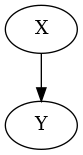

In [4]:
dot = Digraph(comment='Causal Model')
node_styles = {
    "treatment": {"shape": "ellipse", "style": "filled", "color": "lightpink"},
    "outcome": {"shape": "ellipse", "style": "filled", "color": "lightgreen"},
    "confounder": {"shape": "diamond", "style": "filled", "color": "lightblue"},
    "mediator": {"shape": "box", "style": "filled", "color": "lightyellow"},
    "collider": {"shape": "box", "style": "filled", "color": "lightgray"}
}
for node in conn:
    style = {"shape": "ellipse"}
    dot.node(node, node, **style)
for node, parents in conn.items():
    for parent in parents:
        dot.edge(parent, node)
# dot.view()
dot.render(str(misc.temp_root() / 'graph'), format='png')
Image.open(misc.temp_root() / 'graph.png')

In [5]:
treatment, outcome = 'X', 'Y'

In [6]:
net = BernoulliNetwork(conn)

In [7]:
param = net.get_params()
param

tensor([0.8723, 0.7605, 0.4108])

In [8]:
net.ate(treatment, outcome)

/home/fleeb/miniconda3/lib/python3.11/site-packages/torch/masked/maskedtensor/core.py:156: UserWarning: The PyTorch API of MaskedTensors is in prototype stage and will change in the near future. Please open a Github issue for features requests and see our documentation on the torch.masked module for further information about the project.
  warnings.warn(("The PyTorch API of MaskedTensors is in prototype stage "


tensor(-0.3496)

In [9]:
net.set_params(torch.tensor([0.3, 0.5, 0.7]))
net.get_params()

tensor([0.3000, 0.5000, 0.7000])

In [10]:
net.ate(treatment, outcome)

tensor(0.2000)

In [12]:
net = BernoulliNetwork(conn)

In [13]:
treatment, outcome = 'D', 'F'

In [14]:
net['F'].param

tensor([0.7952, 0.3420])

In [15]:
prob_ranges = torch.tensor([[0.4500, 0.5500],
        [0.6000, 0.7000],
        [0.3000, 0.4000],
        [0.7000, 0.8000],
        [0.5000, 0.6000],
        [0.5000, 0.6000],
        [0.9500, 1.0000],
        [0.3000, 0.4000],
        [0.6000, 0.7000],
        [0.4000, 0.5000],
        [0.4000, 0.5000],
        [0.3000, 0.4000],
        [0.5000, 0.6000],
        [0.2000, 0.3000],
        [0.6000, 0.7000],
        [0.5000, 0.6000],
        [0.7000, 0.8000],
        [0.4000, 0.5000],
        [0.7000, 0.8000],
        [0.8000, 0.9000],
        [0.2000, 0.3000],
        [0.4000, 0.5000]])
lower_bound, upper_bound = prob_ranges.t()

In [16]:
param_sample = torch.rand(len(prob_ranges)) * (upper_bound - lower_bound) + lower_bound
param_sample

tensor([0.5269, 0.6578, 0.3722, 0.7517, 0.5942, 0.5023, 0.9779, 0.3376, 0.6296,
        0.4719, 0.4218, 0.3273, 0.5625, 0.2134, 0.6889, 0.5703, 0.7134, 0.4432,
        0.7526, 0.8373, 0.2205, 0.4655])

In [17]:
net.set_params(param_sample)

In [18]:
net.get_params()

tensor([0.5269, 0.6578, 0.3722, 0.7517, 0.5942, 0.5023, 0.9779, 0.3376, 0.6296,
        0.4719, 0.4218, 0.3273, 0.5625, 0.2134, 0.6889, 0.5703, 0.7134, 0.4432,
        0.7526, 0.8373, 0.2205, 0.4655])

In [19]:
net.ate(treatment, outcome)

tensor(-0.1577)

In [20]:
net['F'].param

tensor([0.6296, 0.4719])